In [16]:
# Importing neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from collections import Counter

# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it

In [17]:
data = pd.read_csv('/content/Churn_Modelling (2).csv')
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1        1.0               1   
1     1.0   83807.86              1        0.0               1   
2     8.0  159660.80              3        1.0               0   
3     1.0       0.00              2        0.0               0   
4     NaN  125510.82              1        NaN               1   

   EstimatedSalary  Churn  
0        101348.88      1  
1        112542.58      0  
2        113931.57      1  
3         93826.63      0  
4         79084.10      0

In [18]:
# Features types
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

In [19]:
# numerical feature
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 11
Numerical feature are:
 {'Churn', 'HasCrCard', 'Tenure', 'EstimatedSalary', 'CustomerId', 'Age', 'Balance', 'IsActiveMember', 'RowNumber', 'NumOfProducts', 'CreditScore'}


In [20]:
# Categorical feature
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 3
Categorical feature are:
 {'Gender', 'Geography', 'Surname'}


In [21]:
data.describe


<bound method NDFrame.describe of        RowNumber  CustomerId    Surname  CreditScore Geography  Gender   Age  \
0              1    15634602   Hargrave          619    France  Female  42.0   
1              2    15647311       Hill          608     Spain  Female  41.0   
2              3    15619304       Onio          502    France  Female  42.0   
3              4    15701354       Boni          699    France  Female  39.0   
4              5    15737888   Mitchell          850     Spain  Female  43.0   
...          ...         ...        ...          ...       ...     ...   ...   
9997        9998    15584532        Liu          709    France  Female  36.0   
9998        9999    15682355  Sabbatini          772   Germany    Male  42.0   
9999        9999    15682355  Sabbatini          772   Germany    Male  42.0   
10000      10000    15628319     Walker          792    France  Female  28.0   
10001      10000    15628319     Walker          792    France  Female  28.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0         2.0       0.00              1        1.0               1   
1         1.0   83807.86              1        0.0               1   
2         8.0  159660.80              3        1.0               0   
3         1.0       0.00              2        0.0               0   
4         NaN  125510.82              1        NaN               1   
...       ...        ...            ...        ...             ...   
9997      7.0       0.00              1        0.0               1   
9998      3.0   75075.31              2        1.0               0   
9999      3.0   75075.31              2        1.0               0   
10000     4.0  130142.79              1        1.0               0   
10001     4.0  130142.79              1        1.0               0   

       EstimatedSalary  Churn  
0            101348.88      1  
1            112542.58      0  
2            113931.57      1  
3             93826.63      0  
4             79084.10      0  
...                ...    ...  
9997          42085.58      1  
9998          92888.52      1  
9999          92888.52      1  
10000         38190.78      0  
10001         38190.78      0  

[10002 rows x 14 columns]>

In [22]:
# Total charges are in object dtype so convert into Numerical feature
data['CreditScore'] = pd.to_numeric(data['CreditScore'], errors='coerce')

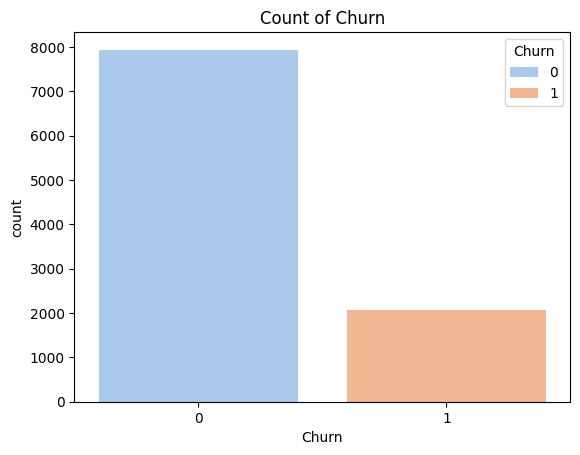

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("pastel")

# Create a countplot with different colors for each category
sns.countplot(data=data, x='Churn', hue='Churn')
plt.title('Count of Churn')

# Show the plot
plt.show()


In [24]:
l1 = data.loc[data['Churn']== 'Yes'].count()[0]
print(f"Pecentage of Left: {l1/len(data['Churn'])}")
print(data.Churn.value_counts())

Pecentage of Left: 0.0
0    7940
1    2062
Name: Churn, dtype: int64


In [25]:
### How many amount loss from customer churn
loss = []
for values in data.loc[data['Churn'] == 1, 'CreditScore']:
    value = float(values)
    loss.append(value)
print(np.round(sum(loss)))

1329852.0


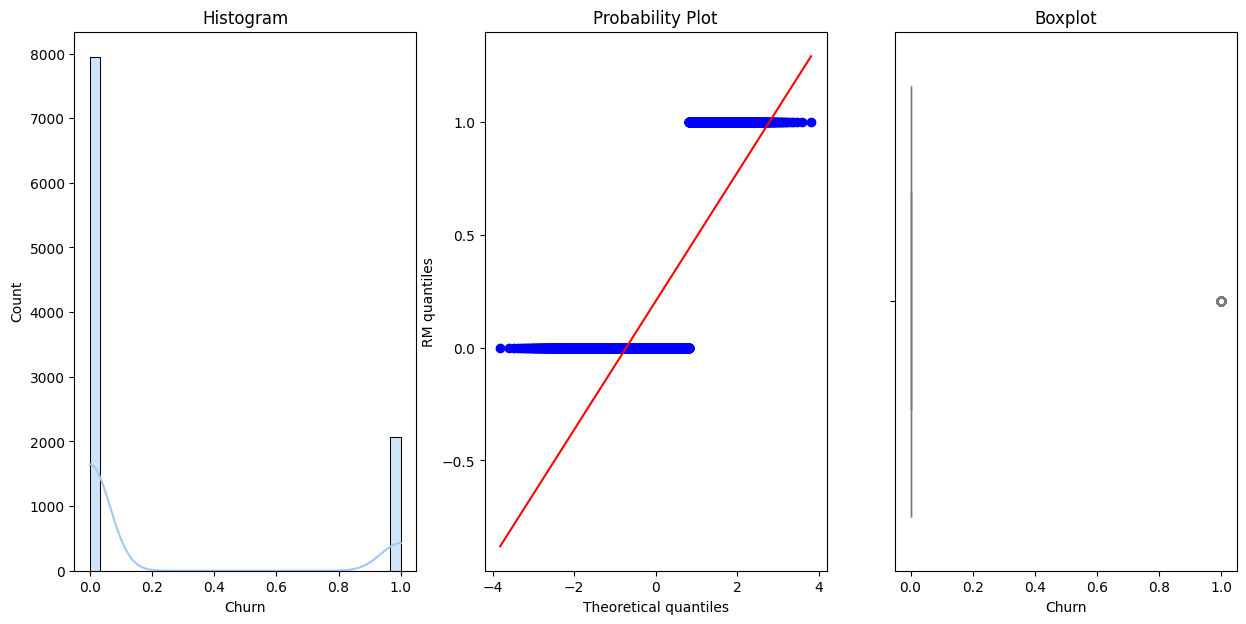

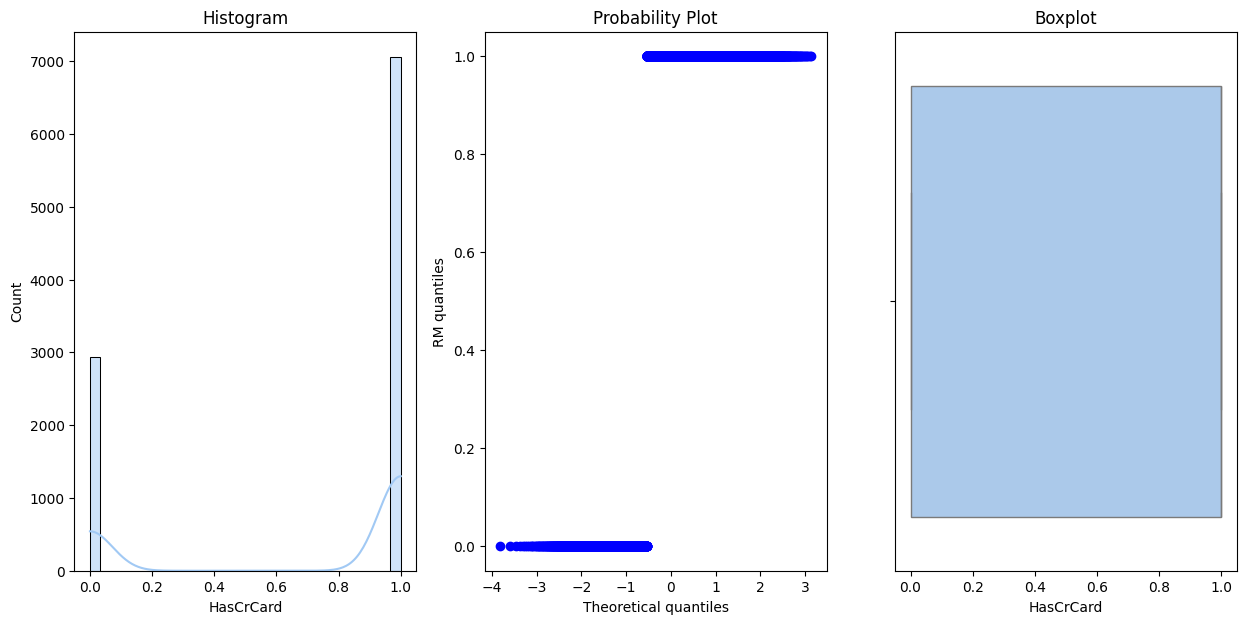

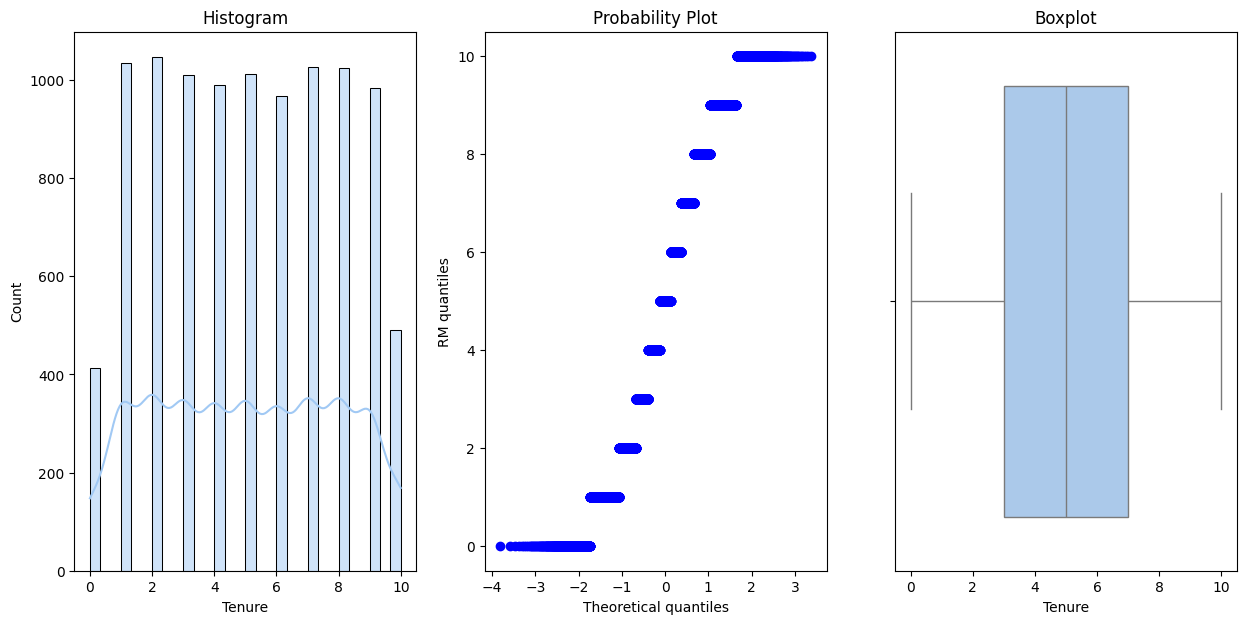

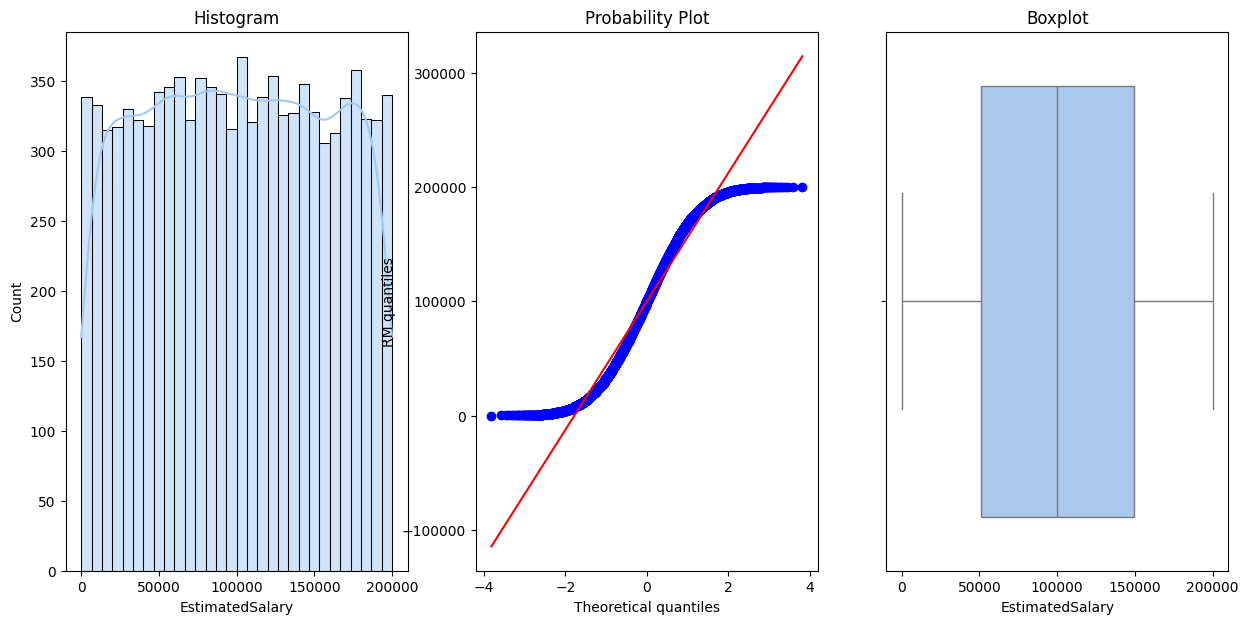

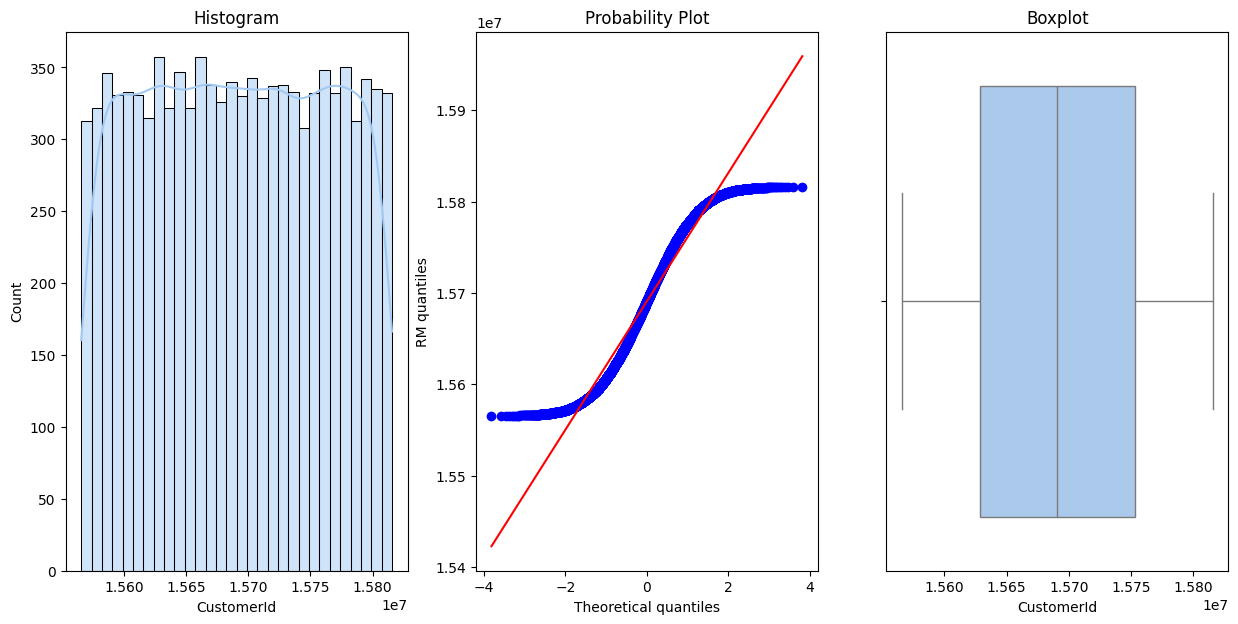

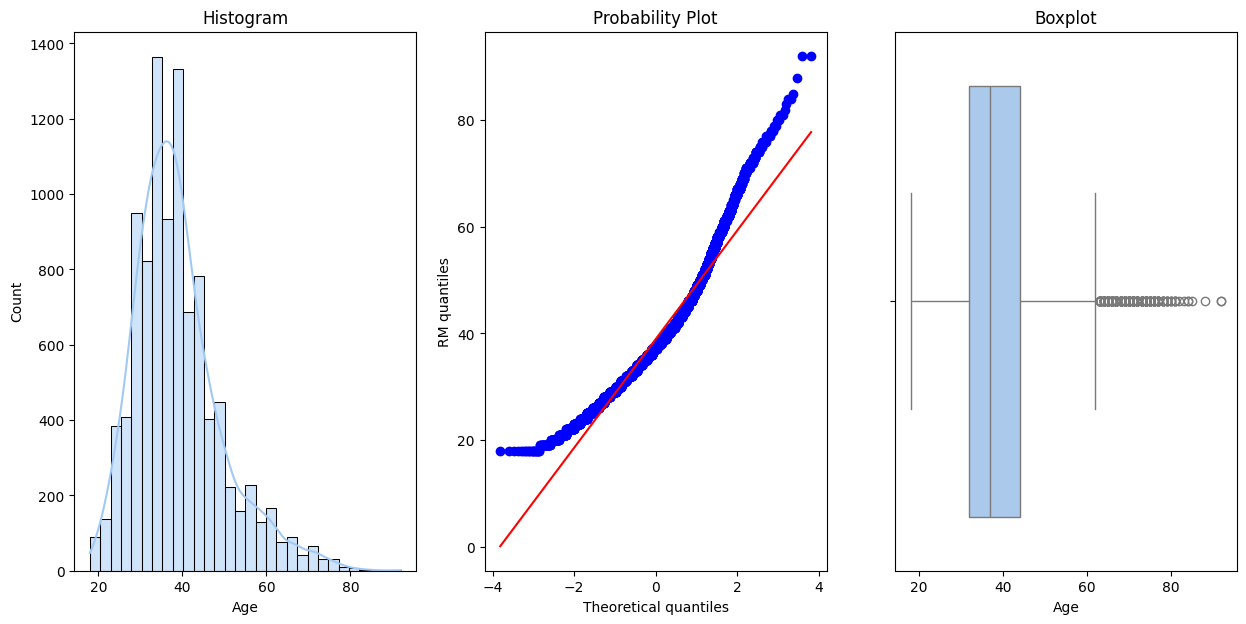

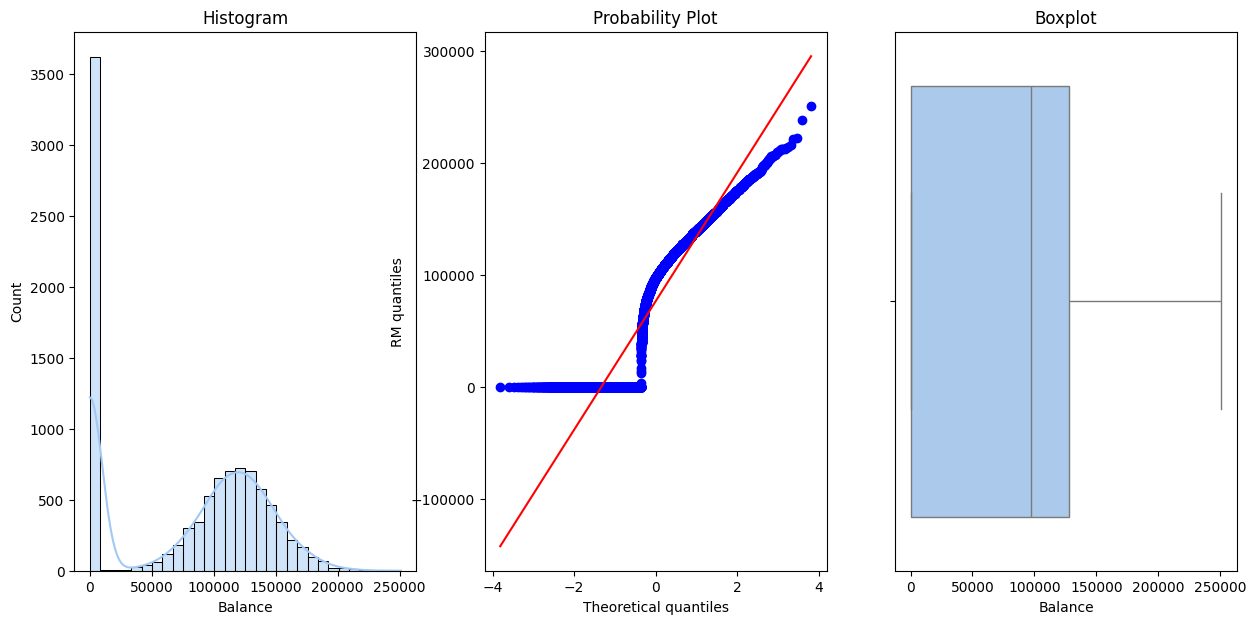

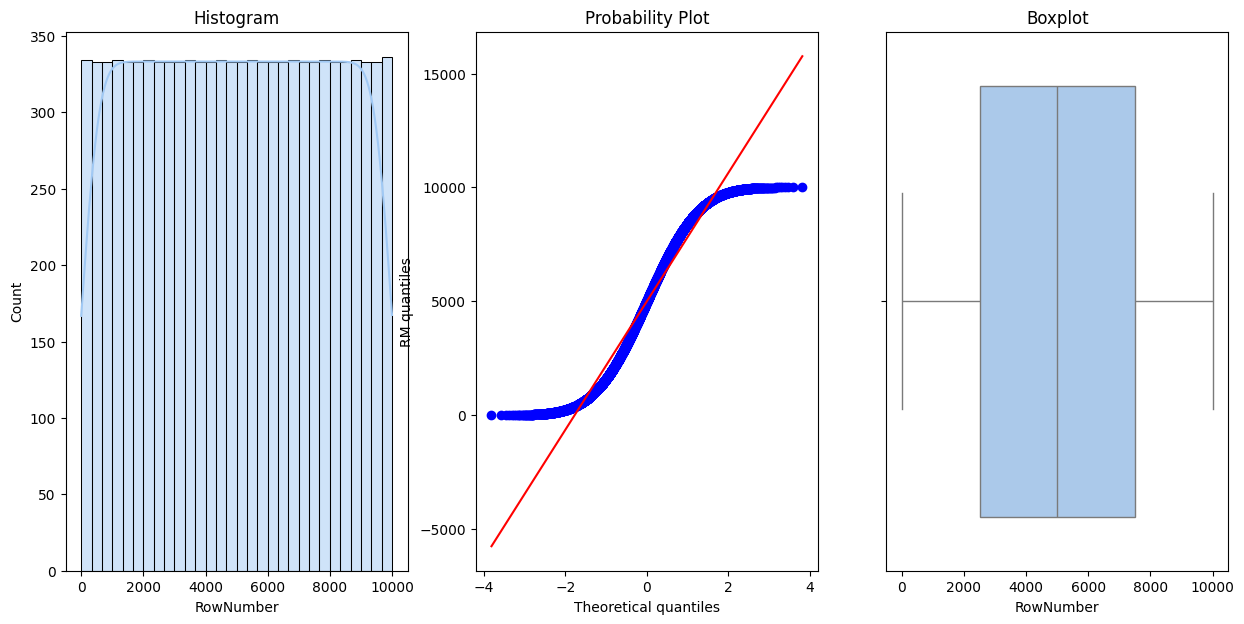

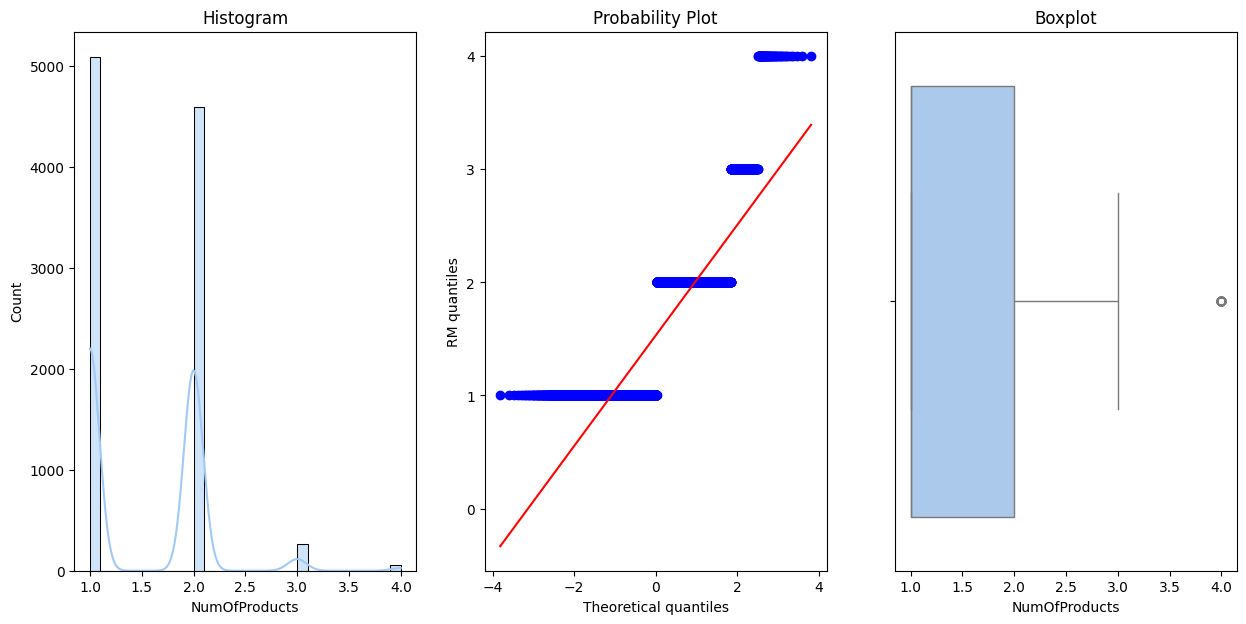

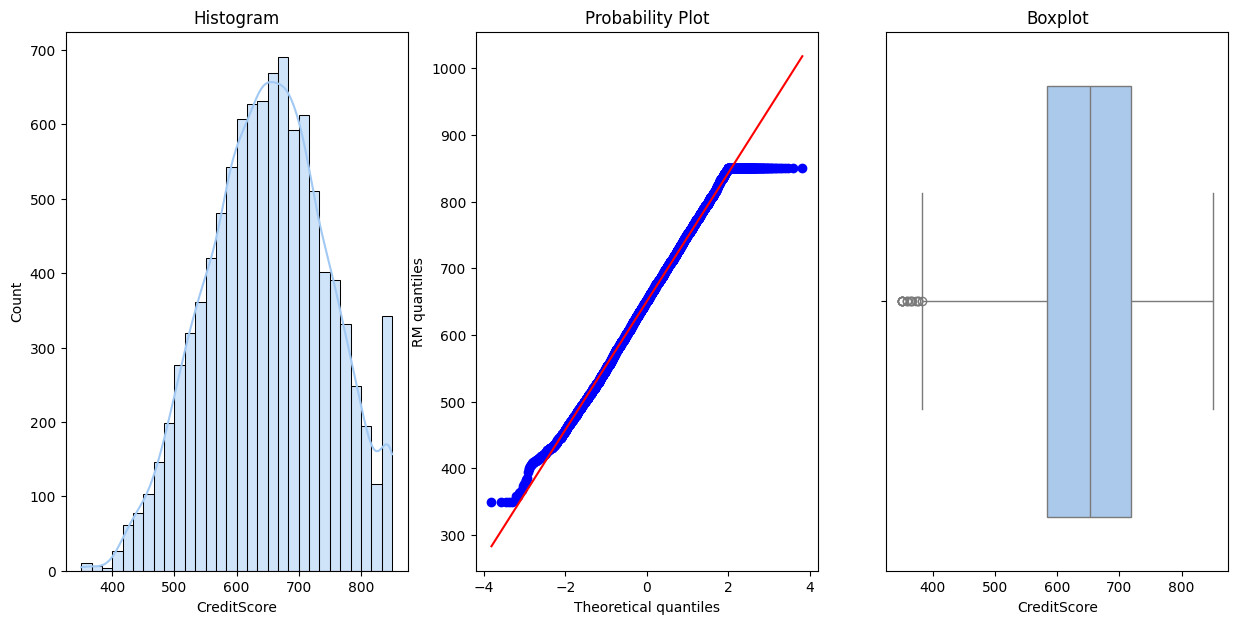

In [26]:
### Plotting numerical feature with probability distribution and checking outlier
for feature in numerical_feature:
    if feature != 'IsActiveMember':
        plt.figure(figsize=(15,7))

        plt.subplot(1, 3, 1)
        sns.histplot(data=data, x=feature, bins=30, kde=True)
        plt.title('Histogram')

        plt.subplot(1, 3, 2)
        stats.probplot(data[feature], dist="norm", plot=plt)
        plt.ylabel('RM quantiles')

        plt.subplot(1, 3, 3)
        sns.boxplot(x=data[feature])
        plt.title('Boxplot')

plt.show()

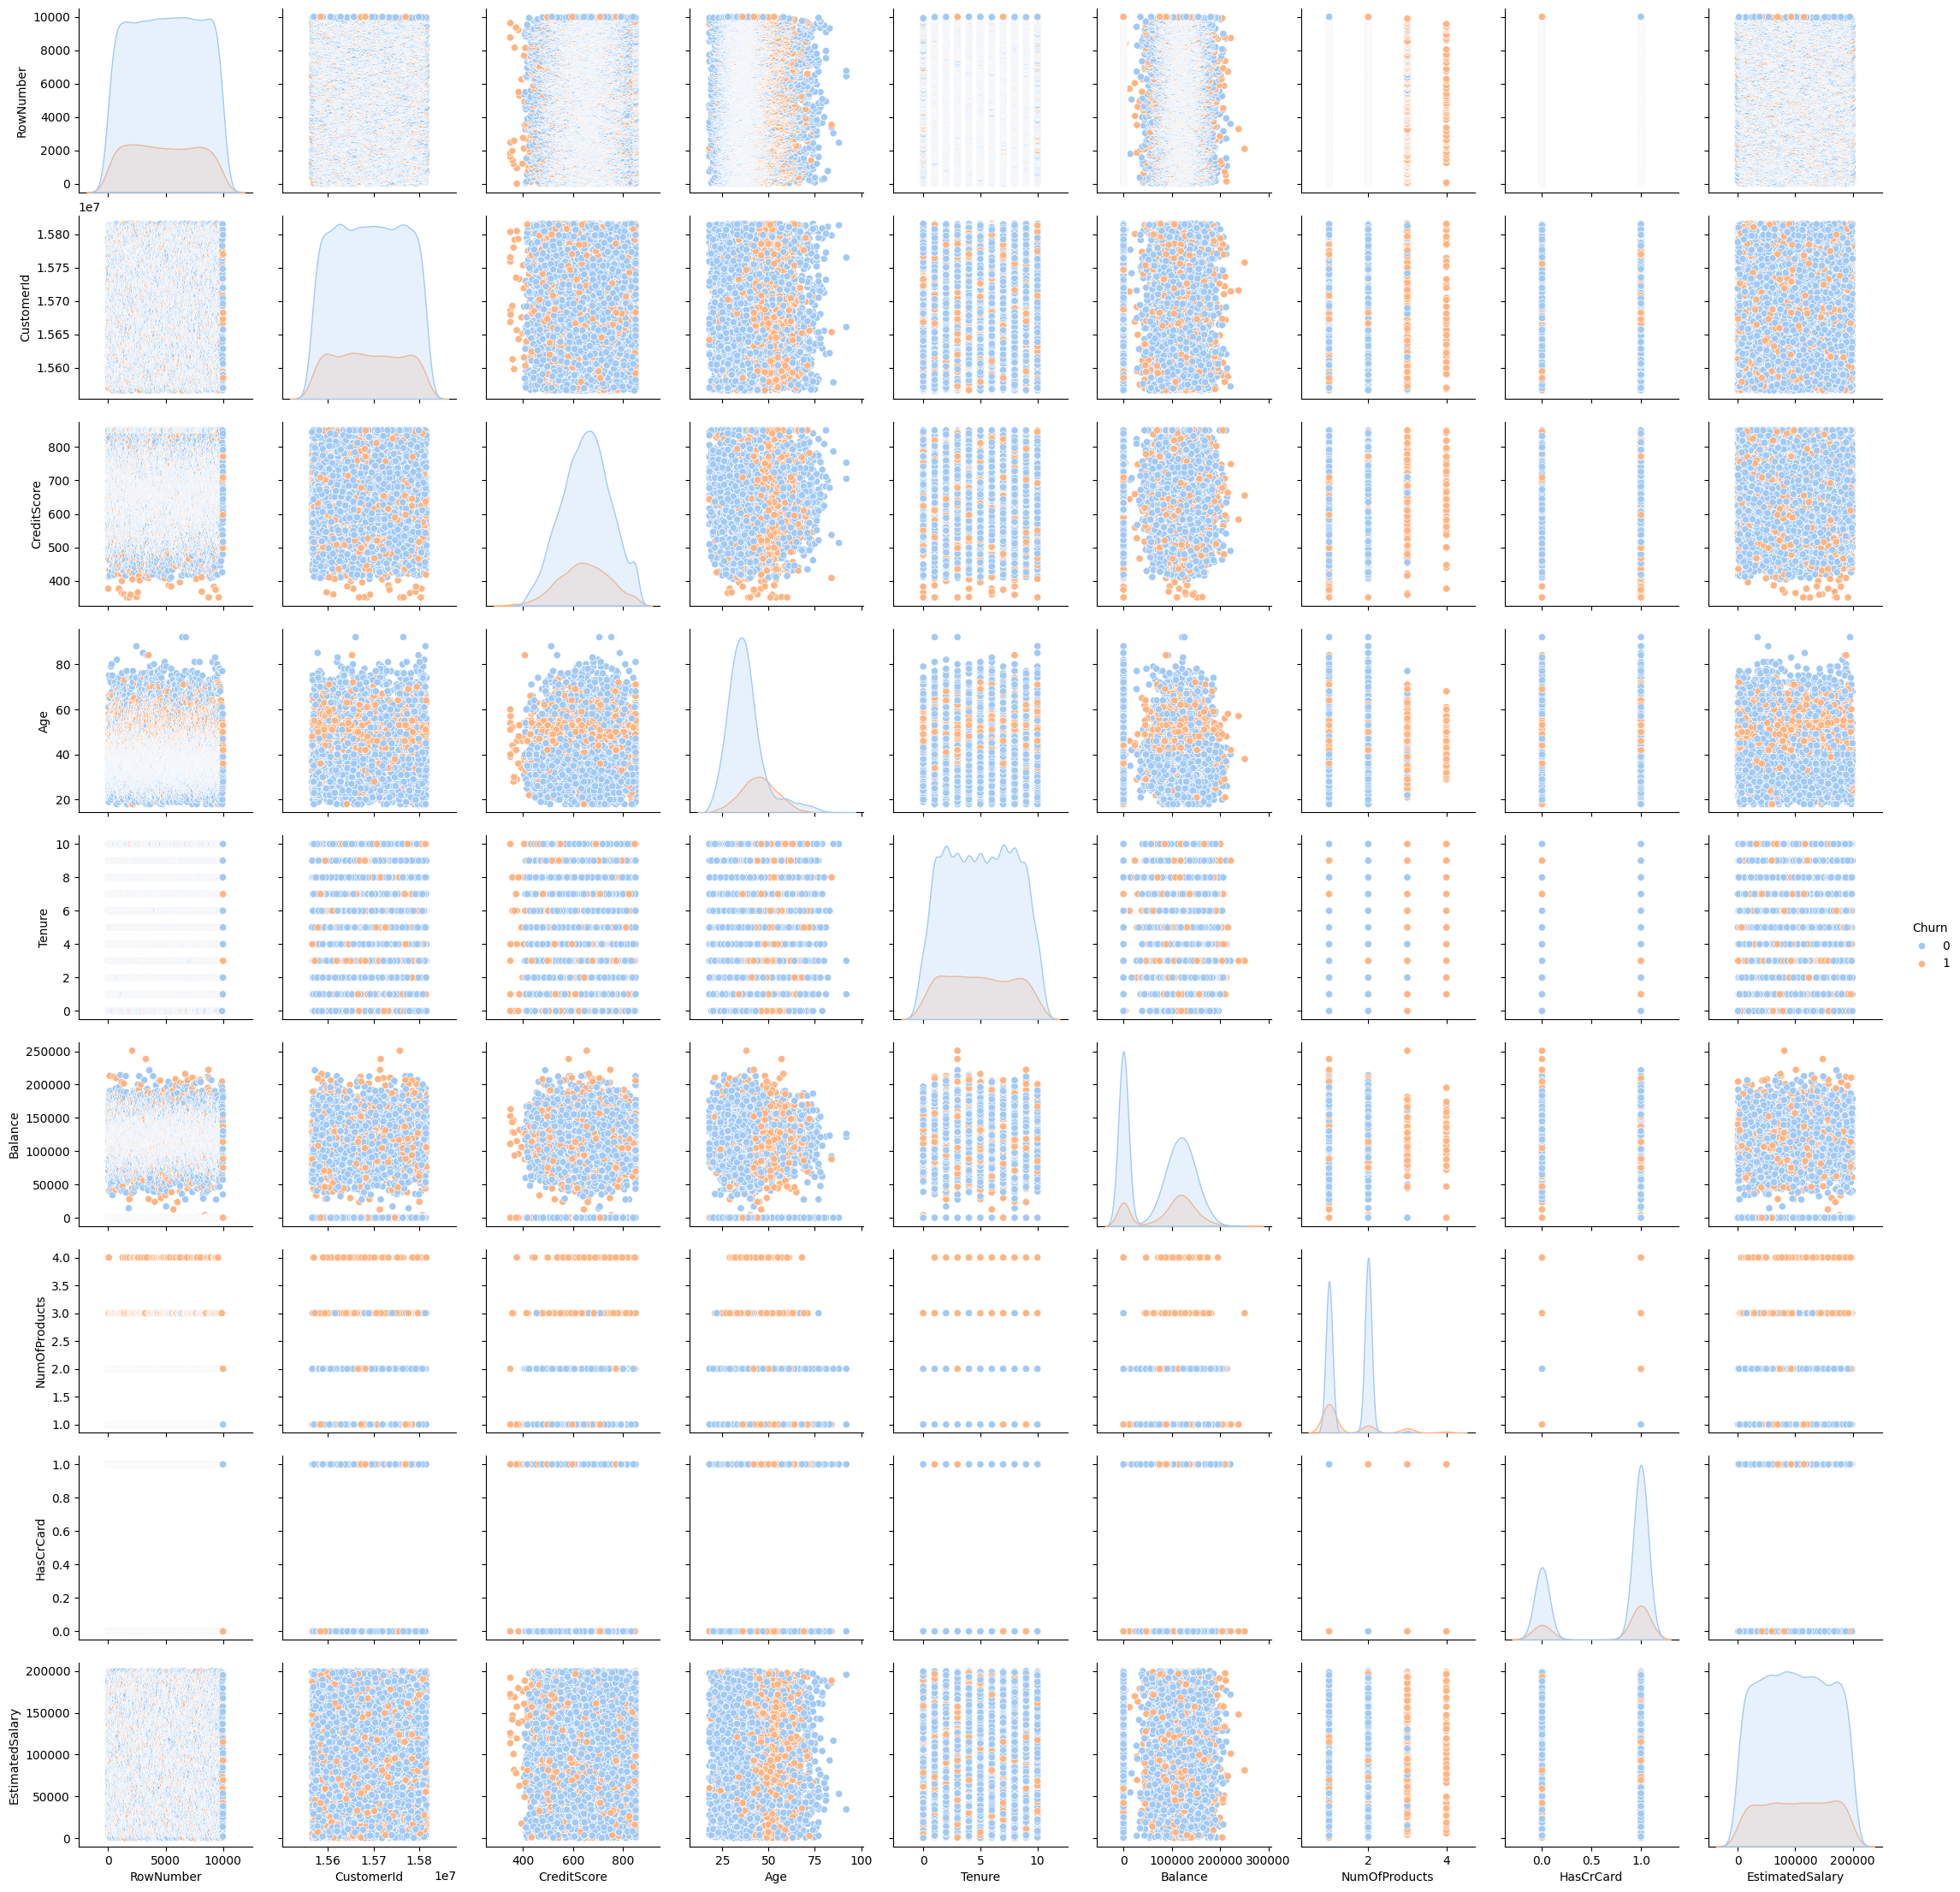

In [27]:
sns.pairplot(data.drop(columns='IsActiveMember'),hue='Churn', kind='scatter')
plt.show()

Text(0.5, 1.0, '% of IsActiveMember')

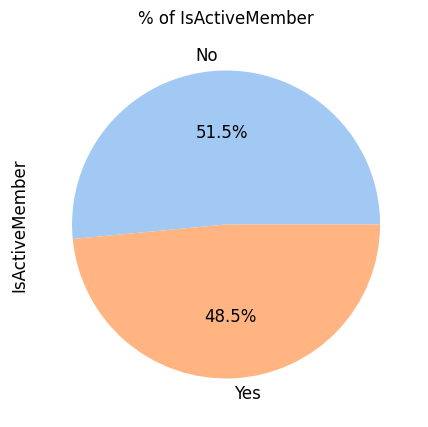

In [28]:
# pie chart for Count of IsActiveMember
ax = (data['IsActiveMember'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('IsActiveMember',fontsize = 12)
ax.set_title('% of IsActiveMember', fontsize = 12)

<Figure size 640x480 with 0 Axes>

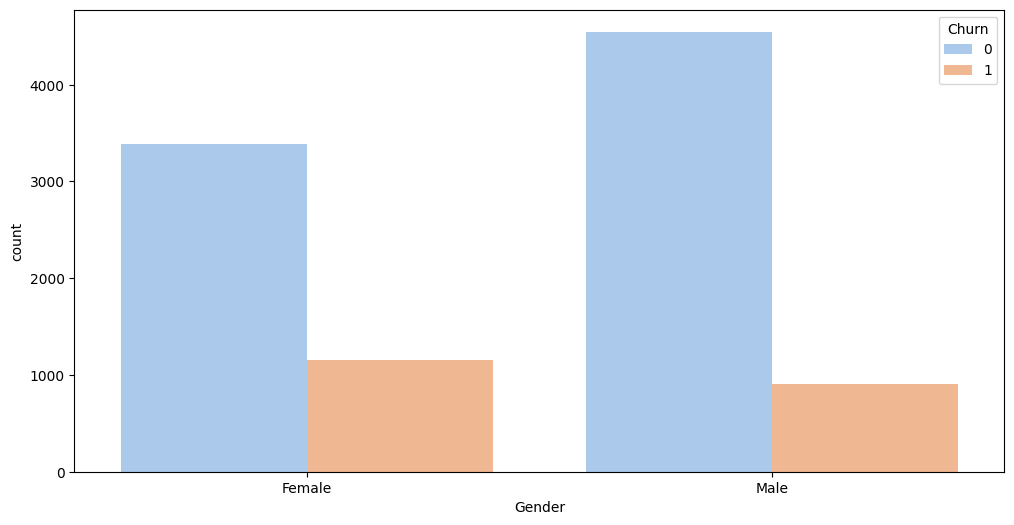

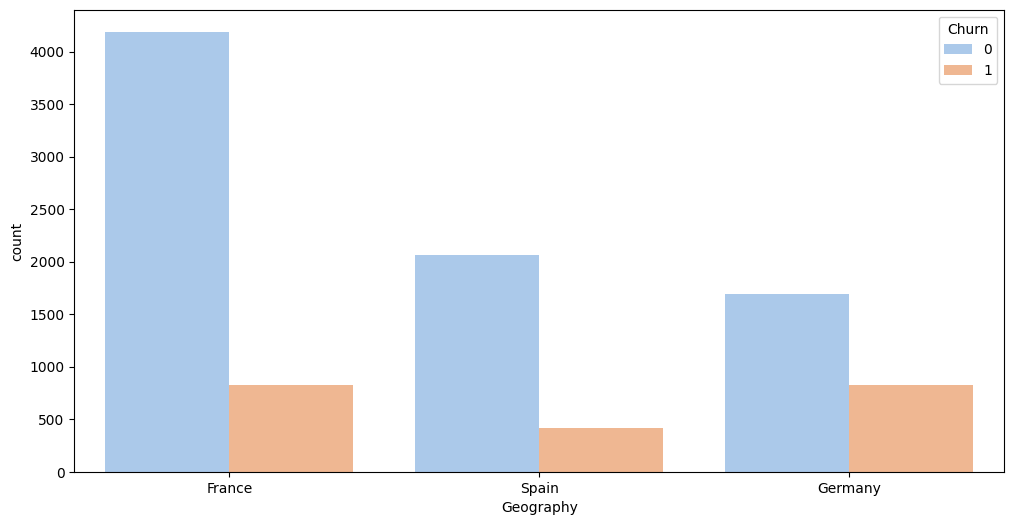

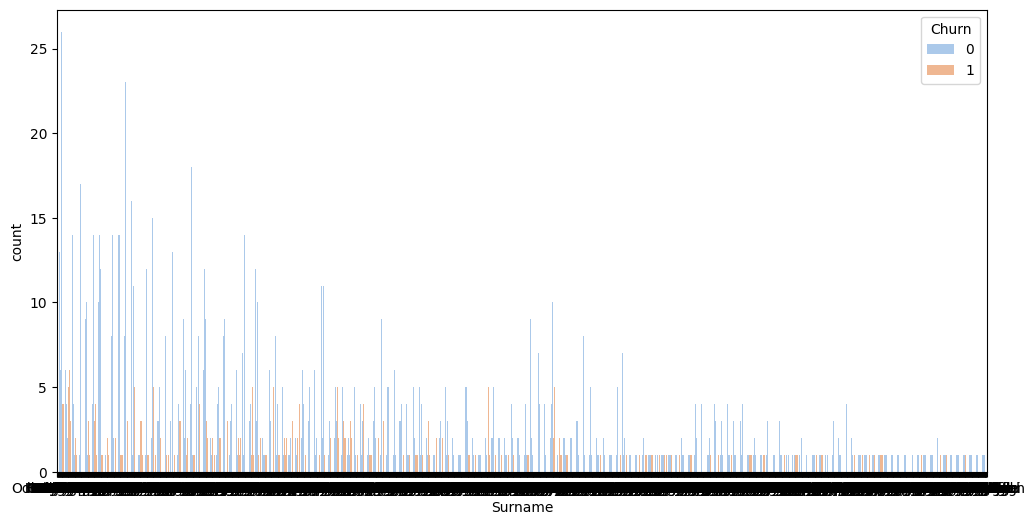

In [29]:
for i, feature in enumerate(categorical_feature):
    if feature != 'CreditScore':
        if feature != 'CustomerID':
            plt.figure(i)
            plt.figure(figsize=(12,6))
            sns.countplot(data=data, x=feature, hue='Churn')
plt.show()

In [30]:
#data cleaning
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1        1.0               1   
1     1.0   83807.86              1        0.0               1   
2     8.0  159660.80              3        1.0               0   
3     1.0       0.00              2        0.0               0   
4     NaN  125510.82              1        NaN               1   

   EstimatedSalary  Churn  
0        101348.88      1  
1        112542.58      0  
2        113931.57      1  
3         93826.63      0  
4         79084.10      0

In [31]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          3
Gender             0
Age                0
Tenure             3
Balance            0
NumOfProducts      0
HasCrCard          8
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

In [32]:
data.Geography = data.Geography.fillna(data.Geography.mode())

In [33]:
data.HasCrCard = data.HasCrCard.fillna(data.HasCrCard.median())

In [34]:
data.Tenure = data.Tenure.fillna(data.Tenure.mean())

In [35]:
print(categorical_feature)

{'Gender', 'Geography', 'Surname'}


In [36]:
encoder = LabelEncoder()
for feature in categorical_feature:
    data[feature] = encoder.fit_transform(data[feature])

In [37]:
data.head()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
0          1    15634602     1115          619          0       0  42.0   
1          2    15647311     1177          608          2       0  41.0   
2          3    15619304     2040          502          0       0  42.0   
3          4    15701354      289          699          0       0  39.0   
4          5    15737888     1822          850          2       0  43.0   

     Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0  2.000000       0.00              1        1.0               1   
1  1.000000   83807.86              1        0.0               1   
2  8.000000  159660.80              3        1.0               0   
3  1.000000       0.00              2        0.0               0   
4  5.012901  125510.82              1        1.0               1   

   EstimatedSalary  Churn  
0        101348.88      1  
1        112542.58      0  
2        113931.57      1  
3         93826.63      0  
4         79084.10      0

In [38]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

In [39]:
data.drop(columns=['CustomerId'], inplace=True)

<Axes: >

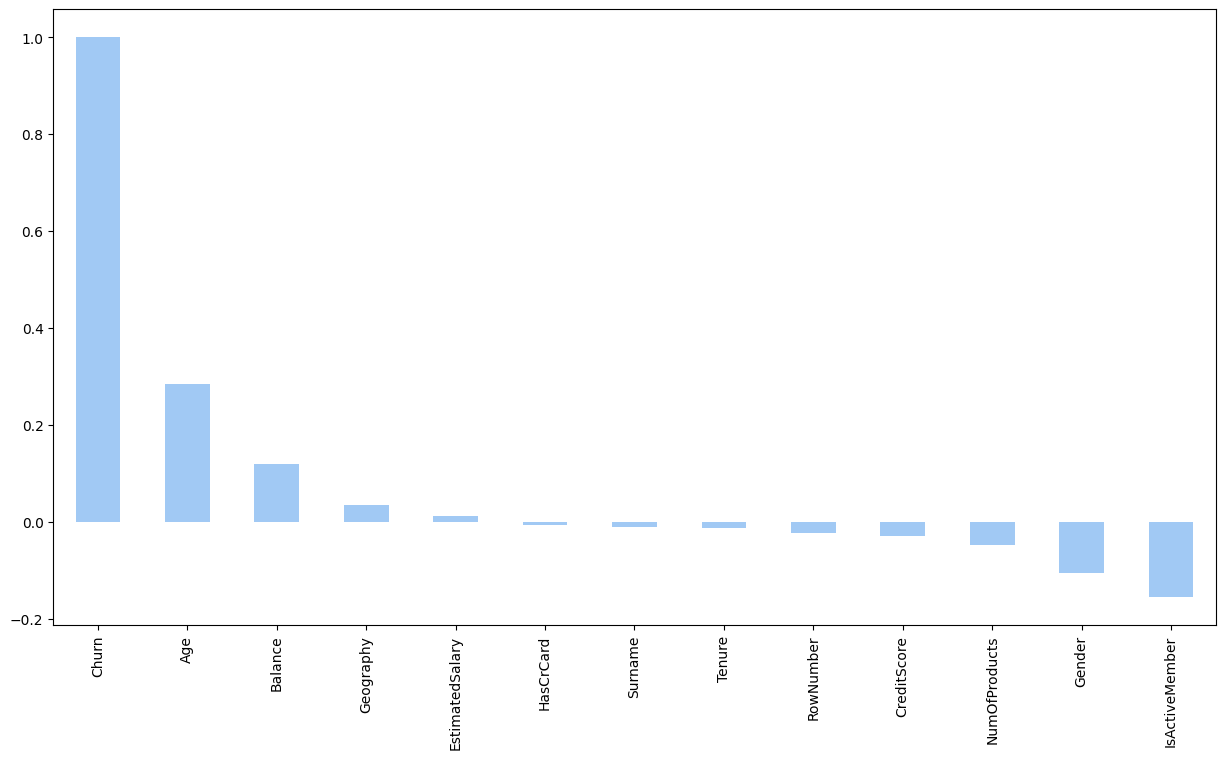

In [40]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

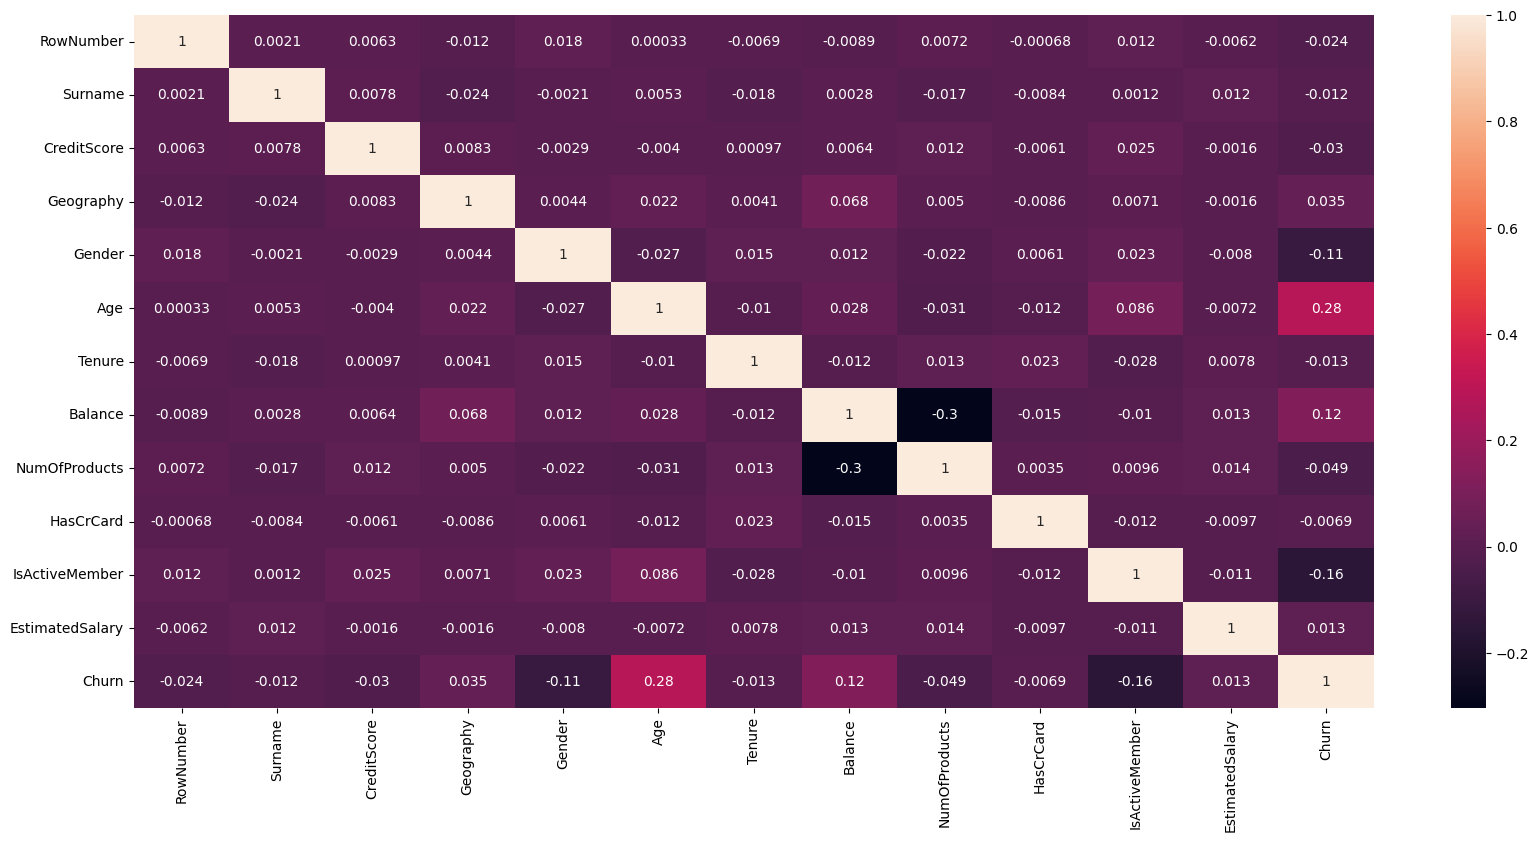

In [41]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), annot=True)

In [42]:
# splitting dataset into dependent and independent feature
X = data.drop(columns='Churn')
y = data['Churn']

In [43]:
X.head()

RowNumber  Surname  CreditScore  Geography  Gender   Age    Tenure  \
0          1     1115          619          0       0  42.0  2.000000   
1          2     1177          608          2       0  41.0  1.000000   
2          3     2040          502          0       0  42.0  8.000000   
3          4      289          699          0       0  39.0  1.000000   
4          5     1822          850          2       0  43.0  5.012901   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              1        1.0               1        101348.88  
1   83807.86              1        0.0               1        112542.58  
2  159660.80              3        1.0               0        113931.57  
3       0.00              2        0.0               0         93826.63  
4  125510.82              1        1.0               1         79084.10

In [44]:
# selects the feature which has more correlation
selection = SelectKBest()  # k=10 default
X = selection.fit_transform(X,y)

In [45]:
#  this will shows which feature are taken denote as True other are removed like false
selection.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True])

In [46]:
 #No need to perform feature scaling for ensemble techniques, its prediction based on the creating multiple decision trees
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
X_train.shape

(8001, 10)

In [48]:
X_test.shape

(2001, 10)

In [49]:
# its an imbalance dataset
y.value_counts()

0    7940
1    2062
Name: Churn, dtype: int64

In [50]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.7946026986506747
Confusion matrix :
 [[1568  368]
 [  43   22]]
Classification report :
               precision    recall  f1-score   support

           0       0.97      0.81      0.88      1936
           1       0.06      0.34      0.10        65

    accuracy                           0.79      2001
   macro avg       0.51      0.57      0.49      2001
weighted avg       0.94      0.79      0.86      2001



In [51]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.8570714642678661
Confusion matrix :
 [[1552  227]
 [  59  163]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.87      0.92      1779
           1       0.42      0.73      0.53       222

    accuracy                           0.86      2001
   macro avg       0.69      0.80      0.72      2001
weighted avg       0.90      0.86      0.87      2001



In [52]:
# decisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.8555722138930535
Confusion matrix :
 [[1543  221]
 [  68  169]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      1764
           1       0.43      0.71      0.54       237

    accuracy                           0.86      2001
   macro avg       0.70      0.79      0.73      2001
weighted avg       0.90      0.86      0.87      2001



In [53]:
 ##we need to do over sampling of data for reducing the TN, FN and increase the FP and TP for model building
 ##Over-sampling using SMOTE and cleaning using ENN
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 6329, 1: 1672})
The number of classes after fit Counter({1: 3570, 0: 2448})


In [54]:
# splitting this over sampling dataset
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [55]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.8637873754152824
Confusion matrix :
 [[426  97]
 [ 67 614]]
Classification report :
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       523
           1       0.86      0.90      0.88       681

    accuracy                           0.86      1204
   macro avg       0.86      0.86      0.86      1204
weighted avg       0.86      0.86      0.86      1204



In [56]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.8920265780730897
Confusion matrix :
 [[435  72]
 [ 58 639]]
Classification report :
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       507
           1       0.90      0.92      0.91       697

    accuracy                           0.89      1204
   macro avg       0.89      0.89      0.89      1204
weighted avg       0.89      0.89      0.89      1204



In [57]:
# logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.7367109634551495
Confusion matrix :
 [[276 100]
 [217 611]]
Classification report :
               precision    recall  f1-score   support

           0       0.56      0.73      0.64       376
           1       0.86      0.74      0.79       828

    accuracy                           0.74      1204
   macro avg       0.71      0.74      0.71      1204
weighted avg       0.77      0.74      0.74      1204



In [58]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9036544850498339
Confusion matrix :
 [[448  71]
 [ 45 640]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       519
           1       0.90      0.93      0.92       685

    accuracy                           0.90      1204
   macro avg       0.90      0.90      0.90      1204
weighted avg       0.90      0.90      0.90      1204



In [59]:
##After using SMOOTEENN methods to perform over sampling and down sampling with edited nearest neighbours.
##From this results we get bet accuraccy and TP FP ratio also increases in GradientBoostClassifier so perform HyperParameter Tunning for this model only
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [60]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
gbc_optm.fit(X_train_sap, y_train_sap)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=150;, score=nan total time=   0.0s
[CV 4/5] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=150;, score=nan total time=   0.0s
[CV 5/5] END criterion=mae, learning_rate=0.1, loss=exponential, max_depth=3, max_leaf_nodes=6, min_samples_leaf=3, min_samples_split=7, n_estimators=150;, score=nan total time=   0.0s
[CV 1/5] END

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   verbose=3)

In [61]:
gbc_optm.best_estimator_

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.4,
                           loss='exponential', max_depth=9, max_leaf_nodes=15,
                           min_samples_leaf=15, min_samples_split=6,
                           n_estimators=300)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [62]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=9,
                           min_samples_split=7, n_estimators=150)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.9136212624584718
Confusion matrix :
 [[439  50]
 [ 54 661]]
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       489
           1       0.93      0.92      0.93       715

    accuracy                           0.91      1204
   macro avg       0.91      0.91      0.91      1204
weighted avg       0.91      0.91      0.91      1204

